In [95]:
"""
    Author : Tyronne Wickramarathne
    Date   : 04-11-2021
    Description : This Python code would perform DFA on Google Mobility Community data and Covid 19 data from the available countries. The purpose of this exercise is to determine the variation within a group and between groups.
    E mail :
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pprint import pprint
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [109]:
#Connecting to the database hosted in the local system, thus, no need to specify the host
client = MongoClient()
db = client['pandemic']

mobility_nsql = db['mobility']
covid_nsql = db['covid']

In [134]:
def getMobilityDataByCountry(country,year):
    mobility_raw = mobility_nsql.find({'Country':country})
    mobility_temp = list(mobility_raw)
    df = DataFrame(mobility_temp)
    df.drop(["_id"], axis = 1, inplace = True)

    start_date = year+'-01-01'
    end_date = year+'-12-31'
    after_start_date = df["Date"] >= start_date
    before_end_date = df["Date"] <= end_date
    between_two_dates = after_start_date & before_end_date
    df = df.loc[between_two_dates]

    df['Month'] = pd.DatetimeIndex(df['Date']).month
    df = df.groupby('Month').mean()
    return df


def getCovidDataByCountry(country,year):
    covid_raw = covid_nsql.find({'location':country})
    covid_temp = list(covid_raw)
    df = DataFrame(covid_temp)
    df.drop(["_id"], axis = 1, inplace = True)

    start_date = year+'-01-01'
    end_date = year+'-12-31'
    after_start_date = df["date"] >= start_date
    before_end_date = df["date"] <= end_date
    between_two_dates = after_start_date & before_end_date
    df = df.loc[between_two_dates]

    df['Month'] = pd.DatetimeIndex(df['date']).month
    df = df.groupby('Month').mean()
    return df


In [156]:
mobility = getMobilityDataByCountry('Australia','2020')
#mobility = mobility.drop(columns={'State','Suburb'})
mobility.head(2)

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit,Workplace,Residential
Month,,,,,,
2,0.212167,2.352772,0.255942,9.035065,12.033563,-1.470432
3,-12.776333,9.165060,-12.545604,-14.155578,-1.891176,4.750836


In [159]:
covid_main = getCovidDataByCountry('Australia','2020')
covid = covid_main[['new_tests','new_cases','new_deaths','new_vaccinations']]
covid = covid.rename(columns={'new_tests':'New Tests','new_cases':'New Cases','new_deaths':'New Deaths','new_vaccinations':'New Vaccinations'})
covid = covid.drop(columns={'New Cases','New Vaccinations','New Tests'})

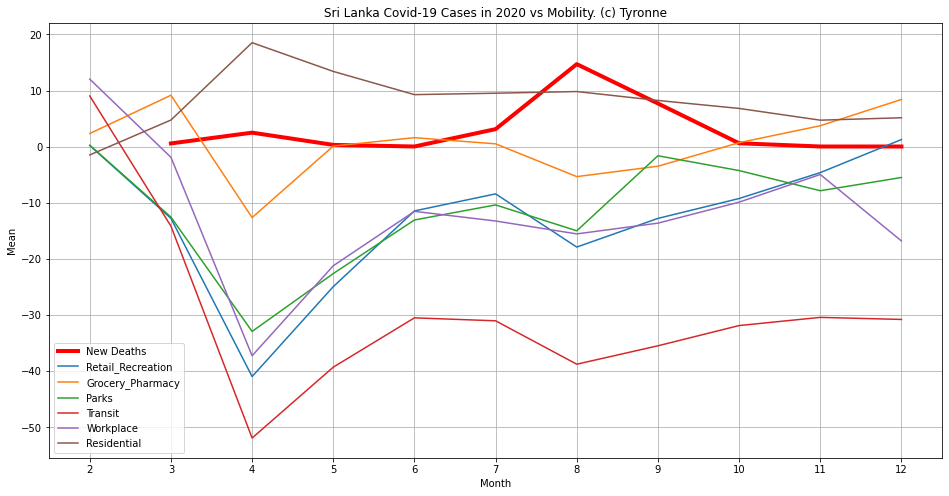

In [161]:
xtiks = np.arange(1, 13, 1)
cols = ['red','brown']

#ax = mobility.plot.line(figsize=(16,10),yticks=ytiks, linewidth=4, color=cols, xticks= xtiks,title='United Kingdom Covid-19 Cases in 2020', ylabel='Number of cases', grid=True)
ax = covid.plot.line(figsize=(16,8), xticks= xtiks, linewidth=4, color=cols, title='Sri Lanka Covid-19 Cases in 2020 vs Mobility. (c) Tyronne', ylabel='Mean', grid=True)
ignore = mobility.plot.line(grid=True, ax=ax)

In [151]:
mobility = getMobilityDataByCountry('Australia', '2021')
#mobility = mobility.drop(columns={'State', 'Suburb'})

In [152]:
covid_main = getCovidDataByCountry('Australia','2021')
covid = covid_main[['new_tests','new_cases','new_deaths','new_vaccinations']]
covid = covid.rename(columns={'new_tests':'New Tests','new_cases':'New Cases','new_deaths':'New Deaths','new_vaccinations':'New Vaccinations'})
covid = covid.drop(columns={'New Vaccinations','New Tests','New Cases'})

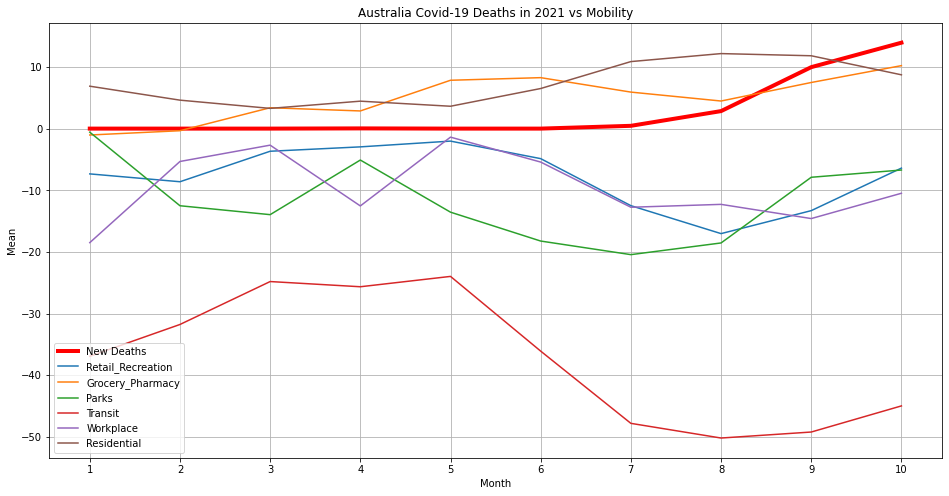

In [154]:
xtiks = np.arange(1, 13, 1)
cols = ['red','green']

#ax = mobility.plot.line(figsize=(16,10),yticks=ytiks, linewidth=4, color=cols, xticks= xtiks,title='United Kingdom Covid-19 Cases in 2020', ylabel='Number of cases', grid=True)
ax = covid.plot.line(figsize=(16,8), xticks= xtiks, linewidth=4, color=cols, title='Australia Covid-19 Deaths in 2021 vs Mobility', ylabel='Mean', grid=True)
ignore = mobility.plot.line(grid=True, ax=ax)

In [162]:
client.close()